In [1]:
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\Projects\\ironkagle_2022002\\sales.csv")

In [3]:
sales.head()

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882


In [4]:
sales.drop(columns=('Unnamed: 0'),axis=1, inplace = True)

In [5]:
sales.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [6]:
sales.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [7]:
sales["state_holiday"].unique()

array(['0', 'a', 'c', 'b'], dtype=object)

In [8]:
sales["open"].unique()

array([1, 0], dtype=int64)

In [9]:
sales["promotion"].unique()

array([0, 1], dtype=int64)

In [10]:
sales["school_holiday"].unique()

array([0, 1], dtype=int64)

In [11]:
sales["state_holiday"].value_counts()

0    621160
a     12842
b      4214
c      2624
Name: state_holiday, dtype: int64

In [12]:
# We saw that we need to transform our features to their correct type

sales['open'] = sales['open'].astype(int)
sales['promotion'] = sales['promotion'].astype(int)
sales['school_holiday'] = sales['school_holiday'].astype(int)

sales['store_ID'] = sales['store_ID'].astype(object)
sales['day_of_week'] = sales['day_of_week'].astype(object)

In [13]:
# We need to correct our date feature to a numerical value in order to be able to process it

from datetime import datetime

def date_to_ordinal(date):
    return datetime.strptime(date, '%Y-%m-%d').toordinal()

sales['date'] = sales['date'].apply(date_to_ordinal)

In [ ]:
# We saw that we dont't need to create a dumy variable, but just validade if it is or not a holiday

#categorical_features = ['state_holiday']

#for col in categorical_features:
#    dummies = pd.get_dummies(sales[col], prefix=col)
#    sales = pd.concat([sales, dummies], axis=1)
#    sales.drop(col, axis=1, inplace=True)
    
#sales.head()

In [ ]:
#sales.groupby(['state_holiday_0','state_holiday_a','state_holiday_b','state_holiday_c']).mean()

In [14]:
# StateHoliday indicates a state holiday. Normally all stores, with few exceptions,
# are closed on state holidays. Note that all schools are closed on public holidays and weekends.
# a = public holiday, b = Easter holiday, c = Christmas, 0 = None

# As we saw that it doesn't matter much what tipe orf holiday it is, we will creat a boolean column just to state
# if it is or not a holiday

sales['state_holiday'] = sales['state_holiday'].replace('a',1).replace('b',1).replace('c',1)
sales['state_holiday'] = sales['state_holiday'].astype(int)

In [15]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  object
 1   day_of_week          640840 non-null  object
 2   date                 640840 non-null  int64 
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int32 
 5   promotion            640840 non-null  int32 
 6   state_holiday        640840 non-null  int32 
 7   school_holiday       640840 non-null  int32 
 8   sales                640840 non-null  int64 
dtypes: int32(4), int64(3), object(2)
memory usage: 34.2+ MB


C:\Users\beatr\AppData\Local\Temp/ipykernel_15320/3927864183.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

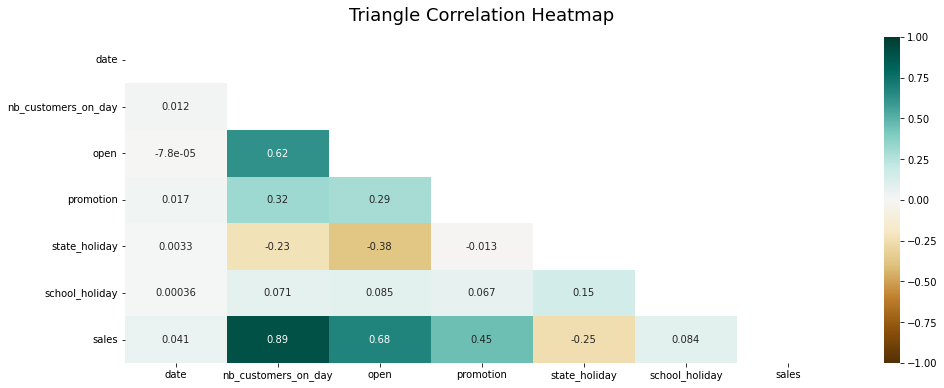

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
 import seaborn as sns

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(sales.corr(), dtype=np.bool))
heatmap = sns.heatmap(sales.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Features Correlating with Type')

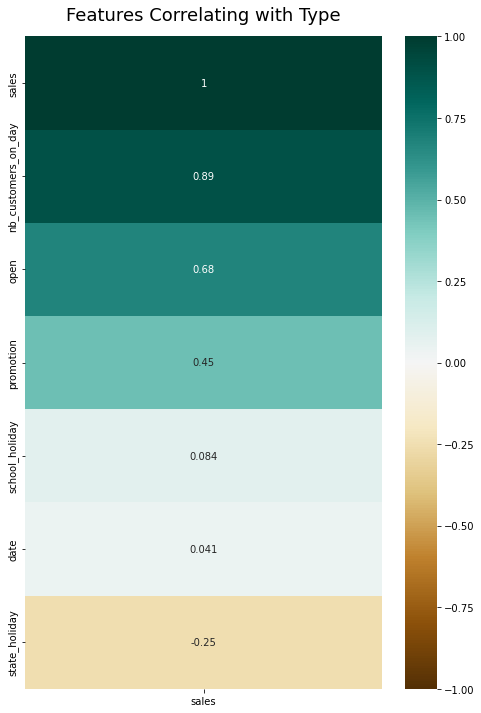

In [20]:
# Just checking the correlation with our target

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sales.corr()[['sales']].sort_values(by='sales', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Type', fontdict={'fontsize':18}, pad=16)

In [21]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Creating two arrays for the feature and target
y = sales['sales']
X = sales.drop('sales',  axis=1)

# Splitting the datasets into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8536564126566989
The rmse is:  1479.8924250377627


In [22]:
# We saw that school_holiday doesn't have a strong correlation to any of our features and target,
# So we will see if we get a better score without this column

sales_featsel = sales.drop(columns='school_holiday',axis=1)

In [23]:
# Instantiating a LinearRegression Model
model = LinearRegression()

# Creating two arrays for the feature and target
y = sales_featsel['sales']
X = sales_featsel.drop('sales',  axis=1)

# Splitting the datasets into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Fitting our model
model.fit(X_train, y_train)
    
# Running Evaluation Metrics

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
print('The r2 is: ', r2)
print('The rmse is: ', rmse)

The r2 is:  0.8543169044047254
The rmse is:  1472.7144494292513


In [24]:
# So... even that school_holiday doesn't have a strong correlation, droping it makes our R^2 be lower
# Beacause of that we decided to keep it

In [25]:
# Also, before doing all of this we've run our model without any chances in our dataset (in other computer).
# The values obtained was:

# The r2 is:  0.8541070570089223
# The rmse is:  1470.1437494420563

# Conclusion so far: we needed to do some changes

In [26]:
sales.describe()

,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.00000,640840.000000,640840.000000
mean,735334.086967,633.398577,0.830185,0.381718,0.03071,0.178472,5777.469011
std,274.469985,464.094416,0.375470,0.485808,0.17253,0.382910,3851.338083
min,734869.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,735097.000000,405.000000,1.000000,0.000000,0.00000,0.000000,3731.000000
50%,735325.000000,609.000000,1.000000,0.000000,0.00000,0.000000,5746.000000
75%,735579.000000,838.000000,1.000000,1.000000,0.00000,0.000000,7860.000000
max,735810.000000,5458.000000,1.000000,1.000000,1.00000,1.000000,41551.000000


In [27]:
# Now... looking to our nb_customers_on_day and sales features we believe that we need to standardize them
# From this point on we will be trully evaluating our model and spliting it into three datasets:
# train, test and validation set

In [109]:
#Create function to clean the data when we get new data

def clean_data(treated_df):
    #drop the column:

    #treated_df.drop(columns=('Unnamed: 0'), axis=1, inplace = True)
    treated_df.drop(columns=('index'), axis=1, inplace = True)
        
    #Change the data type for the columns:
    treated_df['open'] = treated_df['open'].astype(int)
    treated_df['promotion'] = treated_df['promotion'].astype(int)
    treated_df['school_holiday'] = treated_df['school_holiday'].astype(int)
    
    treated_df['store_ID'] = treated_df['store_ID'].astype(object)
    treated_df['day_of_week'] = treated_df['day_of_week'].astype(object)
    
    #Treat the state_holiday column:
    treated_df['state_holiday'] = treated_df['state_holiday'].replace('a',1).replace('b',1).replace('c',1)
    treated_df['state_holiday'] = treated_df['state_holiday'].astype(int)    
    
    #Update the date column:
    treated_df['month'] = pd.DatetimeIndex(treated_df['date'],dayfirst=True).month
    treated_df.drop(columns=('date'), axis=1,inplace=True)
    
    #Drop school holiday:
    treated_df.drop(columns='school_holiday', axis=1 , inplace = True)
    
    return treated_df

In [110]:
validation_data = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\Projects\\ironkagle_2022002\\validation_for students.csv")
validate_finaldf = clean_data(validation_data)

In [111]:
validate_finaldf

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,month
0,415,7,0,0,0,0,3
1,27,7,0,0,0,0,12
2,404,3,657,1,1,0,3
3,683,2,862,1,0,0,1
4,920,3,591,1,1,0,3
...,...,...,...,...,...,...,...
71200,441,7,0,0,0,0,10
71201,377,7,0,0,0,0,8
71202,15,3,648,1,0,0,6
71203,950,2,626,1,1,0,4


In [94]:
sales = pd.read_csv("C:\\Users\\beatr\\Documents\\Beatriz\\Ironhack\\Projects\\ironkagle_2022002\\sales.csv")
sales = clean_data(sales)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Creating two arrays for the feature and target
y = sales['sales']
X = sales.drop(columns=['sales'],  axis=1)

# Splitting the datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

grad_boost_reg = GradientBoostingRegressor(max_depth=11, random_state=0)
grad_boost_reg.fit(X_train, y_train)
y_pred = grad_boost_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(r2)
print(rmse)

0.9644357982556622
726.6796782736358


In [113]:
validate_finaldf['sales_prediction'] = grad_boost_reg.predict(validate_finaldf)

In [101]:
print(y_pred)

[ 7582.77754334  8116.37404703  5608.93784728 ...  9856.42346227
  5997.0456278  12361.85734259]


In [114]:
display(sales.head(5))
display(validation_data.head(5))
display(validate_finaldf.head(5))

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,sales,month
0,366,4,517,1,0,0,4422,4
1,394,6,694,1,0,0,8297,4
2,807,4,970,1,1,0,9729,8
3,802,2,473,1,1,0,6513,5
4,726,4,1068,1,1,0,10882,10


,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,month,sales_prediction
0,415,7,0,0,0,0,3,96.723179
1,27,7,0,0,0,0,12,3.595498
2,404,3,657,1,1,0,3,6729.613810
3,683,2,862,1,0,0,1,7294.005958
4,920,3,591,1,1,0,3,6151.739971


,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,month,sales_prediction
0,415,7,0,0,0,0,3,96.723179
1,27,7,0,0,0,0,12,3.595498
2,404,3,657,1,1,0,3,6729.613810
3,683,2,862,1,0,0,1,7294.005958
4,920,3,591,1,1,0,3,6151.739971


In [116]:
validate_finaldf.to_csv('sales_prediction_g1_df.csv', index=False)

In [ ]:
# Save all the necessary elements in files to share with a user

import pickle

# save the Standardizer to disk
filename = 'STANDARDIZER.sav'
pickle.dump(scale, open(filename, 'wb'))

# save the model to disk
filename = 'MODEL.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
## SAVE THIS FUNCTION IN A .py FILE ##
import pandas as pd
import pickle
#from sklearn.preprocessing import StandardScaler

def pre_processing(features):
    # Feature Scaling
    # If there were feature selection we would include it here
  
    scale = pickle.load(open('STANDARDIZER.sav', 'rb'))
    return pd.DataFrame(scale.transform(features) , columns = features.columns)

In [ ]:
## New data point....




In [ ]:
#from jrm_preprocessing import pre_processing

import pickle
import pandas as pd
from jrm_preprocessing import pre_processing

new_point = pd.DataFrame.from_dict(new_point)
display(new_point)

new_point_process = pre_processing(new_point)
display(new_point_procss)

# load the model from disk
model = pickle.load(open('MODEL.sav', 'rb'))
model.predict(new_point_process)